<a href="https://colab.research.google.com/github/krishnakumar51/Loan-Approval-System/blob/main/Loan_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Approval**

In [ ]:
import pandas as pd


In [ ]:
import numpy as np

In [ ]:
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [ ]:
json_data = pd.read_json('/content/drive/MyDrive/Notes/loan_approval_dataset.json')


In [ ]:
data = json_data

In [ ]:
data = pd.DataFrame(data)

In [ ]:
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [ ]:
data.drop(["Id"], inplace= True, axis=1)

In [ ]:
data.drop(["CITY"], inplace= True, axis=1)

In [ ]:
data.head(10)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tamil_Nadu,3,14,1
5,6915937,64,0,single,rented,no,Civil_servant,Maharashtra,0,12,0
6,3954973,58,14,married,rented,no,Librarian,Tamil_Nadu,8,12,0
7,1706172,33,2,single,rented,no,Economist,Gujarat,2,14,0
8,7566849,24,17,single,rented,yes,Flight_attendant,Rajasthan,11,11,0
9,8964846,23,12,single,rented,no,Architect,Telangana,5,13,0


In [ ]:
# Filter the DataFrame where Income is less than 5,000,000
filtered_data = data[data['Income'] < 3000000]

filtered_data = data[data['CURRENT_JOB_YRS'] < 3]

filtered_data = data[data['Married/Single'] == 'single']

# Count the number of rows where Risk_Flag is 0 in the filtered DataFrame
risk_flag_zero_count = filtered_data[filtered_data['Risk_Flag'] == 0].shape[0]
risk_flag_zero_count

197912

In [ ]:
data.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


<Axes: >

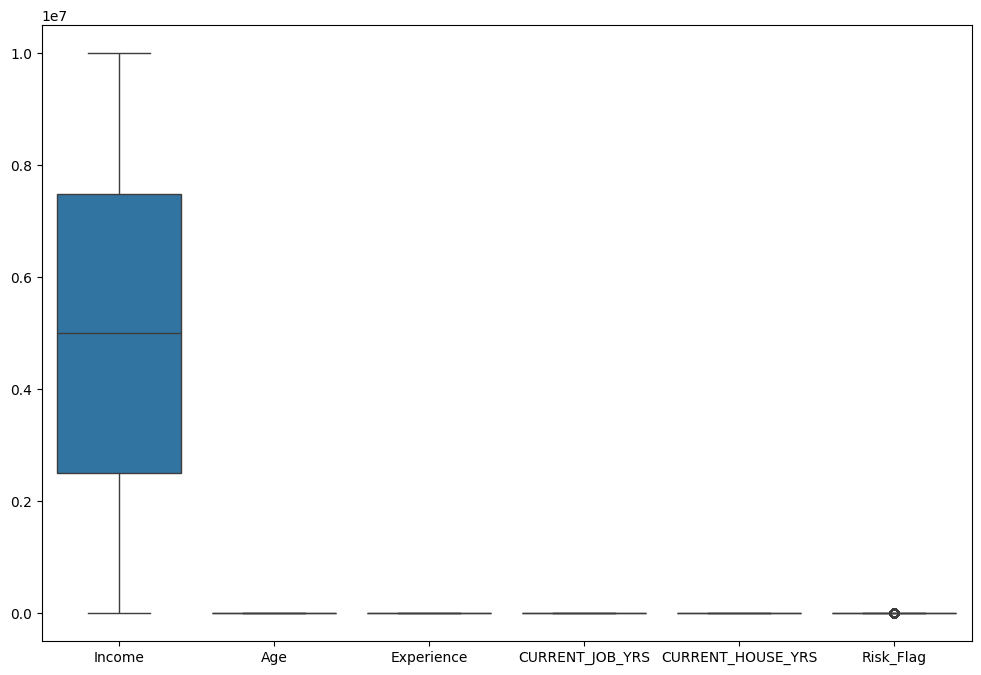

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data = data)

In [ ]:
state_count =data["STATE"].value_counts()

In [ ]:
print(data['House_Ownership'].value_counts())

House_Ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64


In [ ]:
data[data["House_Ownership"]=="norent_noown"]

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
25,1797876,76,20,single,norent_noown,no,Mechanical_engineer,Tamil_Nadu,11,14,0
50,4260004,27,5,single,norent_noown,no,Police_officer,Madhya_Pradesh,5,13,0
175,6694786,69,17,single,norent_noown,no,Surveyor,Telangana,11,11,1
223,2433481,48,0,single,norent_noown,yes,Biomedical_Engineer,Chhattisgarh,0,14,0
312,6787542,22,0,single,norent_noown,no,Hotel_Manager,Jharkhand,0,12,1
...,...,...,...,...,...,...,...,...,...,...,...
251887,2747123,52,19,single,norent_noown,yes,Graphic_Designer,West_Bengal,5,14,1
251916,1463152,22,19,single,norent_noown,no,Software_Developer,West_Bengal,13,13,0
251934,5762469,22,1,single,norent_noown,no,Dentist,Tamil_Nadu,1,12,0
251946,4348278,27,5,single,norent_noown,yes,Secretary,Karnataka,5,10,0


Number of people who took a loan by Married/Single:
Married/Single
single     226272
married     25728
Name: count, dtype: int64


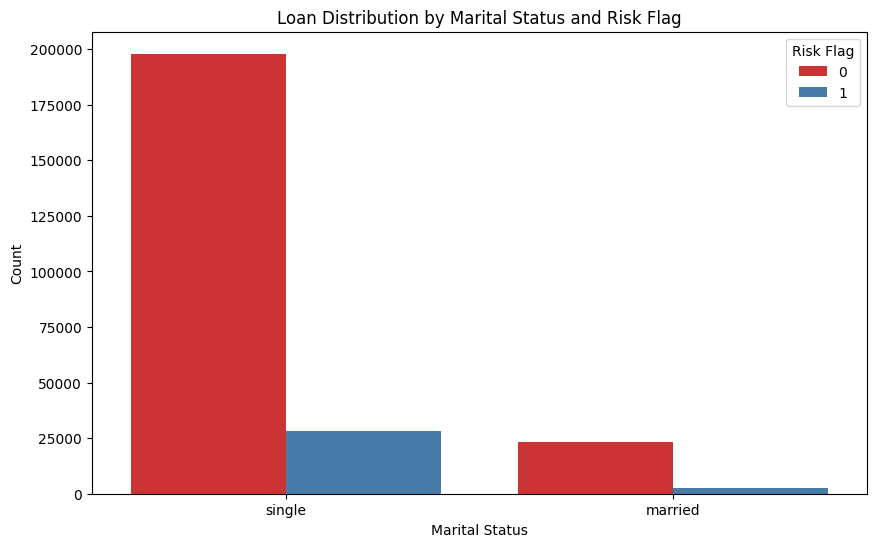

In [ ]:
# Print the number of people who took a loan by Married/Single
print('Number of people who took a loan by Married/Single:')
print(data['Married/Single'].value_counts())

# Use a count plot to visualize Married/Single with hue set to Risk_Flag
plt.figure(figsize=(10, 6))
sns.countplot(x='Married/Single', data=data, palette='Set1', hue='Risk_Flag')
plt.title('Loan Distribution by Marital Status and Risk Flag')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Risk Flag')
plt.show()

Number of people who took a loan by Car_Ownership:
Car_Ownership
no     176000
yes     76000
Name: count, dtype: int64


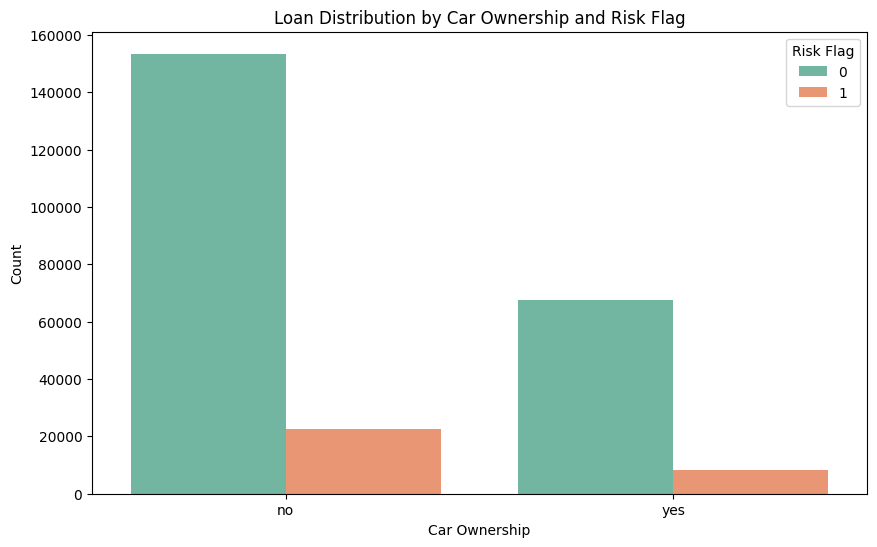

In [ ]:
# Print the number of people who took a loan by Car_Ownership
print('Number of people who took a loan by Car_Ownership:')
print(data['Car_Ownership'].value_counts())

# Use a count plot to visualize Car_Ownership with hue set to Risk_Flag
plt.figure(figsize=(10, 6))
sns.countplot(x='Car_Ownership', data=data, palette='Set2', hue='Risk_Flag')
plt.title('Loan Distribution by Car Ownership and Risk Flag')
plt.xlabel('Car Ownership')
plt.ylabel('Count')
plt.legend(title='Risk Flag')
plt.show()

Number of people who took a loan by House Ownership:
House_Ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64


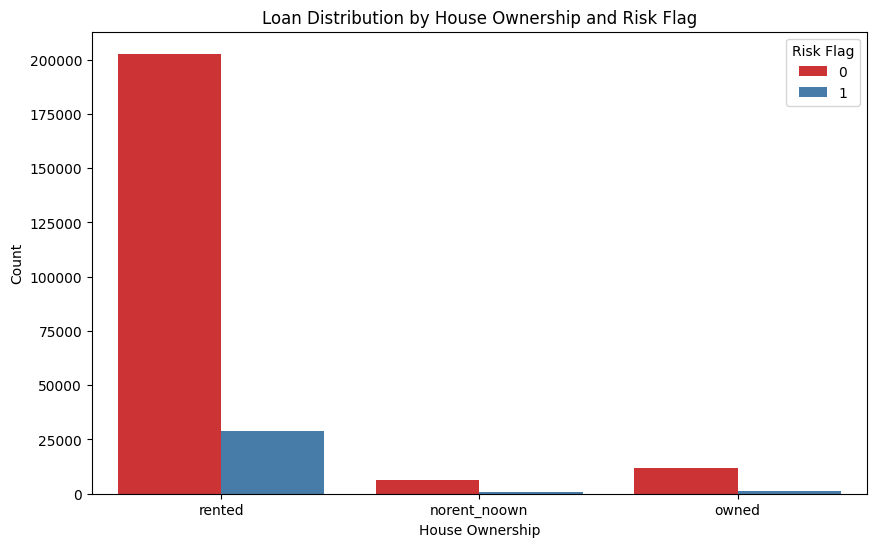

In [ ]:
# Print the number of people who took a loan by House_Ownership
print('Number of people who took a loan by House Ownership:')
print(data['House_Ownership'].value_counts())

# Use a count plot to visualize House_Ownership with hue set to Risk_Flag
plt.figure(figsize=(10, 6))
sns.countplot(x='House_Ownership', data=data, palette='Set1', hue='Risk_Flag')
plt.title('Loan Distribution by House Ownership and Risk Flag')
plt.xlabel('House Ownership')
plt.ylabel('Count')
plt.legend(title='Risk Flag')
plt.show()


Number of people who took a loan by Experience:
Experience
6     13158
9     12936
12    12800
18    12601
10    12503
5     12441
14    12369
19    12287
17    12131
16    12106
3     12069
15    11993
4     11807
13    11713
1     11575
11    11449
20    11350
8     11350
7     11232
2     11087
0     11043
Name: count, dtype: int64


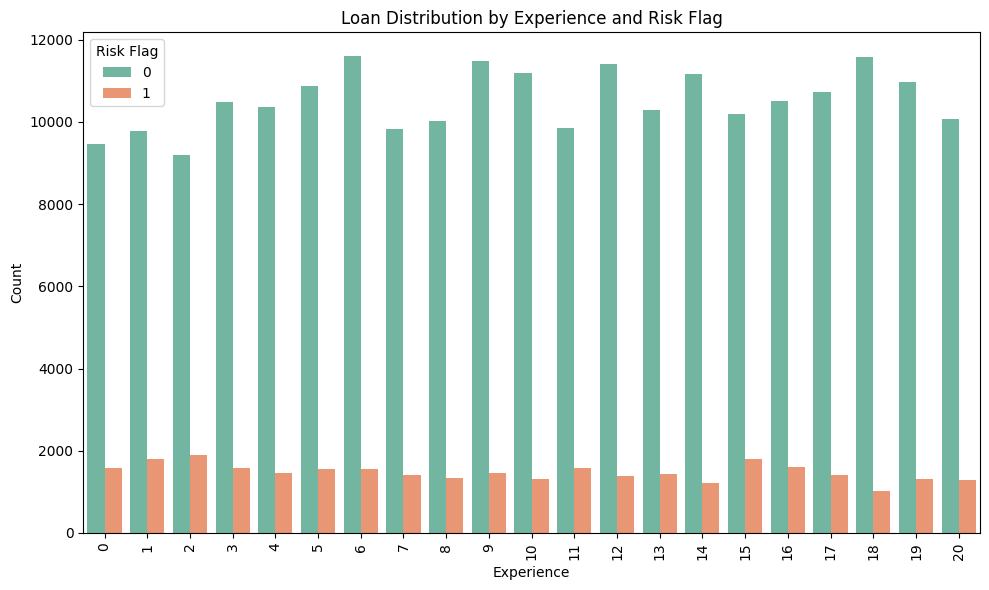

In [ ]:
# Print the number of people who took a loan by Experience
print('Number of people who took a loan by Experience:')
print(data['Experience'].value_counts())

# Use a count plot to visualize Experience with hue set to Risk_Flag
plt.figure(figsize=(10, 6))
sns.countplot(x='Experience', data=data, palette='Set2', hue='Risk_Flag')
plt.title('Loan Distribution by Experience and Risk Flag')
plt.xlabel('Experience')
plt.ylabel('Count')
plt.legend(title='Risk Flag')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Number of people who took a loan by Car_Ownership:
Car_Ownership
no     176000
yes     76000
Name: count, dtype: int64


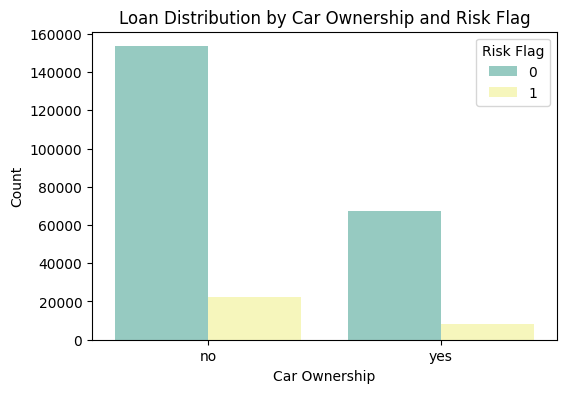

In [ ]:
# Print the number of people who took a loan by Car_Ownership
print('Number of people who took a loan by Car_Ownership:')
print(data['Car_Ownership'].value_counts())

# Use a count plot to visualize Car_Ownership with hue set to Risk_Flag
plt.figure(figsize=(6, 4))
sns.countplot(x='Car_Ownership', data=data, palette='Set3', hue='Risk_Flag')
plt.title('Loan Distribution by Car Ownership and Risk Flag')
plt.xlabel('Car Ownership')
plt.ylabel('Count')
plt.legend(title='Risk Flag')
plt.xticks(rotation=0)  # No rotation needed for categorical variables
plt.show()


Number of people who took a loan by STATE:
STATE
Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: count, dtype: int64


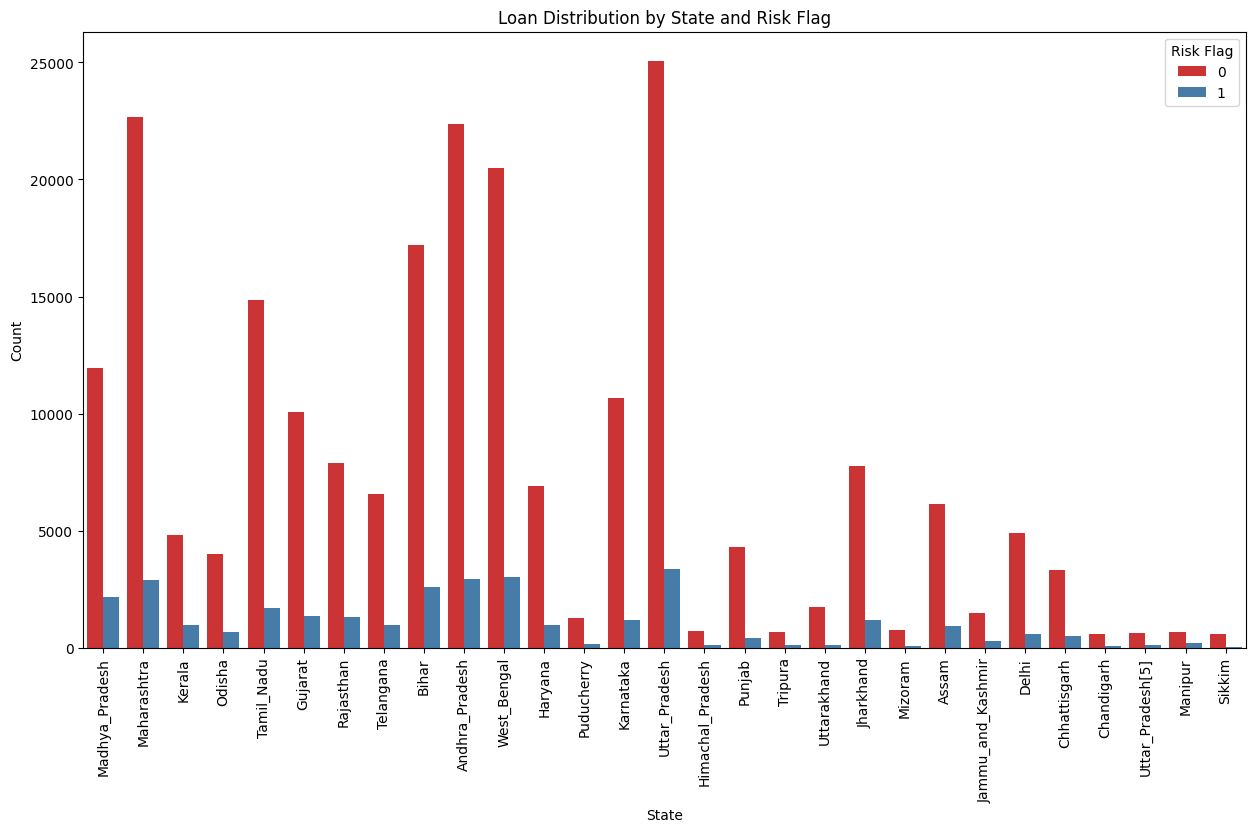

In [ ]:
# Print the number of people who took a loan by STATE
print('Number of people who took a loan by STATE:')
print(data['STATE'].value_counts())

# Use a count plot to visualize STATE with hue set to Risk_Flag
plt.figure(figsize=(15, 8))
sns.countplot(x='STATE', data=data, palette='Set1', hue='Risk_Flag')
plt.title('Loan Distribution by State and Risk Flag')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Risk Flag')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Number of people who took a loan by Profession:
Profession
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4

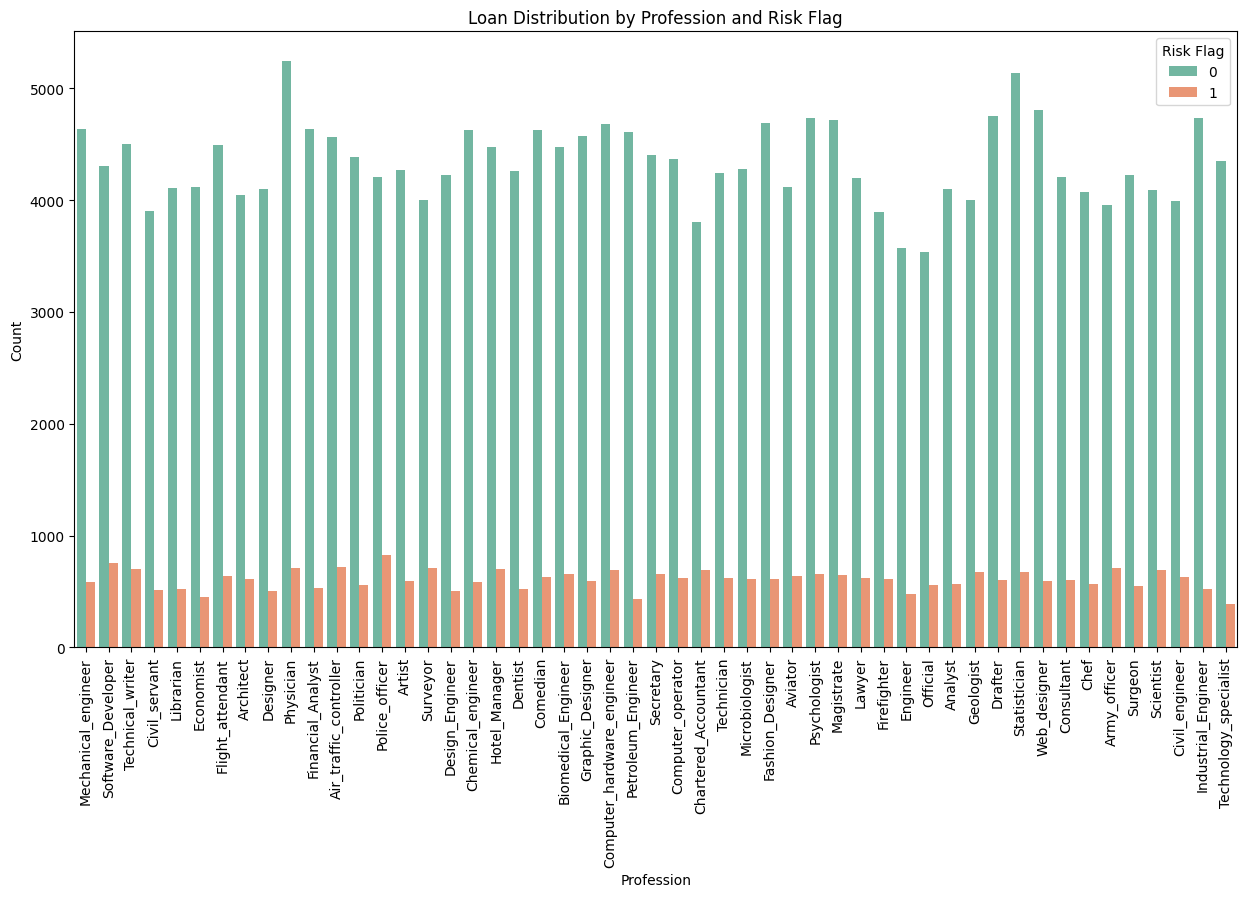

In [ ]:
# Print the number of people who took a loan by Profession
print('Number of people who took a loan by Profession:')
print(data['Profession'].value_counts())

# Use a count plot to visualize Profession with hue set to Risk_Flag
plt.figure(figsize=(15, 8))
sns.countplot(x='Profession', data=data, palette='Set2', hue='Risk_Flag')
plt.title('Loan Distribution by Profession and Risk Flag')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.legend(title='Risk Flag')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
numerical_data = data.select_dtypes(include=['int64', "float64"])

<Axes: >

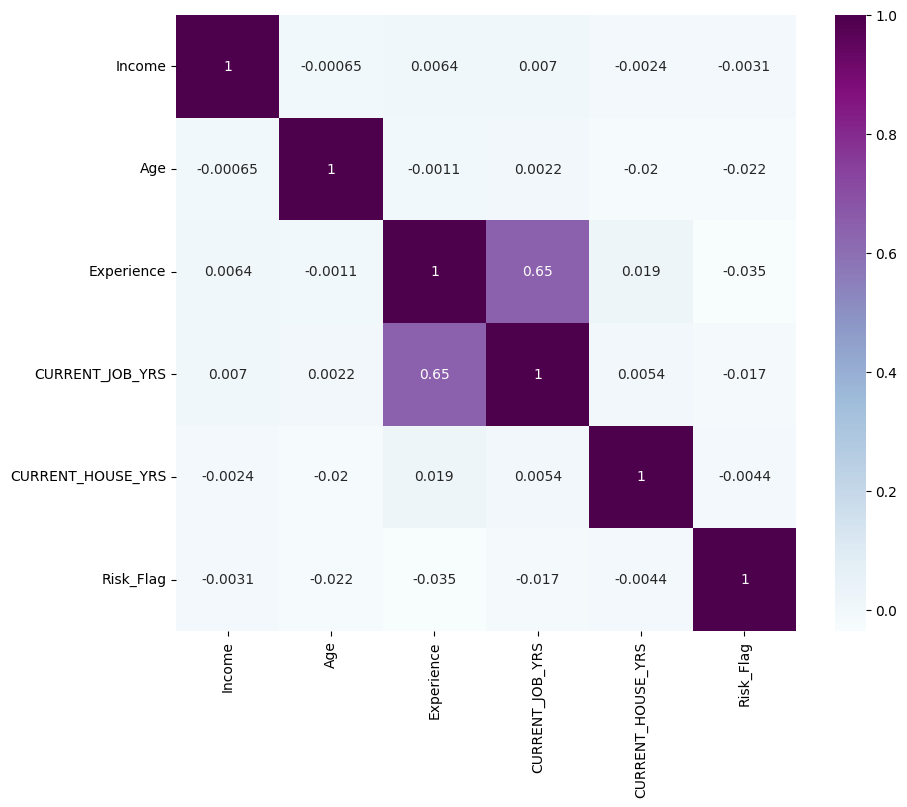

In [ ]:
corr = numerical_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot = True, cmap = 'BuPu')

In [ ]:
# Stack the correlation matrix and convert it to a DataFrame
corr_pairs = corr.stack().reset_index()
corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Filter out self-correlations (where Feature1 == Feature2)
corr_pairs = corr_pairs[corr_pairs['Feature1'] != corr_pairs['Feature2']]

# Sort the correlations by absolute value
corr_pairs = corr_pairs.sort_values(by='Correlation', ascending=False, key=abs)

# Display the top correlations
print("Top Correlations:")
print(corr_pairs.head(10))

Top Correlations:
             Feature1           Feature2  Correlation
15         Experience    CURRENT_JOB_YRS     0.646098
20    CURRENT_JOB_YRS         Experience     0.646098
32          Risk_Flag         Experience    -0.034523
17         Experience          Risk_Flag    -0.034523
11                Age          Risk_Flag    -0.021809
31          Risk_Flag                Age    -0.021809
25  CURRENT_HOUSE_YRS                Age    -0.020134
10                Age  CURRENT_HOUSE_YRS    -0.020134
16         Experience  CURRENT_HOUSE_YRS     0.019309
26  CURRENT_HOUSE_YRS         Experience     0.019309


In [ ]:
data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tamil_Nadu,3,14,1


In [ ]:
data_with_all_numbers = data.drop(['Profession','STATE' ], axis=1)

In [ ]:
## Encoding Technique : Label Encoding, One Hot Encoding

from sklearn.preprocessing import LabelEncoder
cols = ['Married/Single','House_Ownership','Car_Ownership']
le =  LabelEncoder()
# List to store mappings
label_mappings = {}
for col in cols:
  data_with_all_numbers[col] =  le.fit_transform(data_with_all_numbers[col])
  # Store mappings for each column
  label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

In [ ]:
# Print mappings
for col, mappings in label_mappings.items():
    print(f"Column: {col}")
    print("Label Encoder mappings:")
    for label, value in mappings.items():
        print(f"  {label}: {value}")
    print()

Column: Married/Single
Label Encoder mappings:
  married: 0
  single: 1

Column: House_Ownership
Label Encoder mappings:
  norent_noown: 0
  owned: 1
  rented: 2

Column: Car_Ownership
Label Encoder mappings:
  no: 0
  yes: 1



In [ ]:
data_with_all_numbers.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,3,13,0
1,7574516,40,10,1,2,0,9,13,0
2,3991815,66,4,0,2,0,4,10,0
3,6256451,41,2,1,2,1,2,12,1
4,5768871,47,11,1,2,0,3,14,1


In [ ]:
X = data_with_all_numbers.drop(columns = ['Risk_Flag'],axis = 1)
y = data_with_all_numbers['Risk_Flag']

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)


In [ ]:
## Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train,y_train)
y_pred_model1 = model1.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_model1)

In [ ]:
accuracy*100

87.59325396825398

In [ ]:
## Decision Tree Classifier

model2 = DecisionTreeClassifier()
model2.fit(X_train,y_train)
y_pred_model2 = model2.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_model2)
print("Accuracy score of Decision Tree: ", accuracy*100)

Accuracy score of Decision Tree:  88.13492063492063


In [ ]:
## Random Forest Classifier
model3 = RandomForestClassifier()
model3.fit(X_train,y_train)
y_pred_model3 = model3.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_model3)
print("Accuracy score of Random Forest: ", accuracy*100)

Accuracy score of Random Forest:  89.70833333333333


In [ ]:
#KNearestNeighbors model
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_train,y_train)
y_pred_model4 = model4.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_model4)
print("Accuracy score of KNeighbors: ", accuracy*100)

Accuracy score of KNeighbors:  88.32936507936508


In [ ]:
# Gradient Boosting model
model5 = GradientBoostingClassifier()
model5.fit(X_train, y_train)
y_pred_model5 = model5.predict(X_test)
accuracy5 = accuracy_score(y_test, y_pred_model5)
print("Accuracy score of Gradient Boosting: ", accuracy5 * 100)

Accuracy score of Gradient Boosting:  87.60912698412699


In [ ]:
# XGBoost model
model6 = xgb.XGBClassifier()
model6.fit(X_train, y_train)
y_pred_model6 = model6.predict(X_test)
accuracy6 = accuracy_score(y_test, y_pred_model6)
print("Accuracy score of XGBoost: ", accuracy6 * 100)

Accuracy score of XGBoost:  88.56150793650794


In [ ]:
# Neural Network model
model7 = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)
model7.fit(X_train, y_train)
y_pred_model7 = model7.predict(X_test)
accuracy7 = accuracy_score(y_test, y_pred_model7)
print("Accuracy score of Neural Network: ", accuracy7 * 100)

Accuracy score of Neural Network:  87.59325396825398


In [ ]:
# Naive Bayes model
model8 = GaussianNB()
model8.fit(X_train, y_train)
y_pred_model8 = model8.predict(X_test)
accuracy8 = accuracy_score(y_test, y_pred_model8)
print("Accuracy score of Naive Bayes: ", accuracy8 * 100)

Accuracy score of Naive Bayes:  87.59325396825398


In [ ]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name,y_test,y_pred):
  report = classification_report(y_test,y_pred)
  print(f"Classification Report For {model_name}:\n{report}\n")

generate_classification_report(model1,y_test,y_pred_model1)
generate_classification_report(model2,y_test,y_pred_model2)
generate_classification_report(model3,y_test,y_pred_model3)
generate_classification_report(model4,y_test,y_pred_model4)
generate_classification_report(model5,y_test,y_pred_model5)
generate_classification_report(model6,y_test,y_pred_model6)
generate_classification_report(model7,y_test,y_pred_model7)
generate_classification_report(model8,y_test,y_pred_model8)

Classification Report For LogisticRegression():
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     44147
           1       0.00      0.00      0.00      6253

    accuracy                           0.88     50400
   macro avg       0.44      0.50      0.47     50400
weighted avg       0.77      0.88      0.82     50400




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report For DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     44147
           1       0.52      0.57      0.54      6253

    accuracy                           0.88     50400
   macro avg       0.73      0.75      0.74     50400
weighted avg       0.89      0.88      0.88     50400


Classification Report For RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     44147
           1       0.59      0.54      0.57      6253

    accuracy                           0.90     50400
   macro avg       0.76      0.74      0.75     50400
weighted avg       0.89      0.90      0.90     50400


Classification Report For KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     44147
           1       0.53      0.48      0.51      6253

    accuracy 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Classification Report For GaussianNB():
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     44147
           1       0.00      0.00      0.00      6253

    accuracy                           0.88     50400
   macro avg       0.44      0.50      0.47     50400
weighted avg       0.77      0.88      0.82     50400




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.datasets import make_classification


In [ ]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from sklearn.metrics import roc_curve, auc, accuracy_score

In [ ]:
# Generating a sample dataset (replace this with your actual dataset)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Dictionary to store model predictions and probabilities
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=3),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
    'Naive Bayes': GaussianNB()
}

In [ ]:
# Train models, predict, and compute ROC curve data
roc_data = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = (fpr, tpr, roc_auc, accuracy)

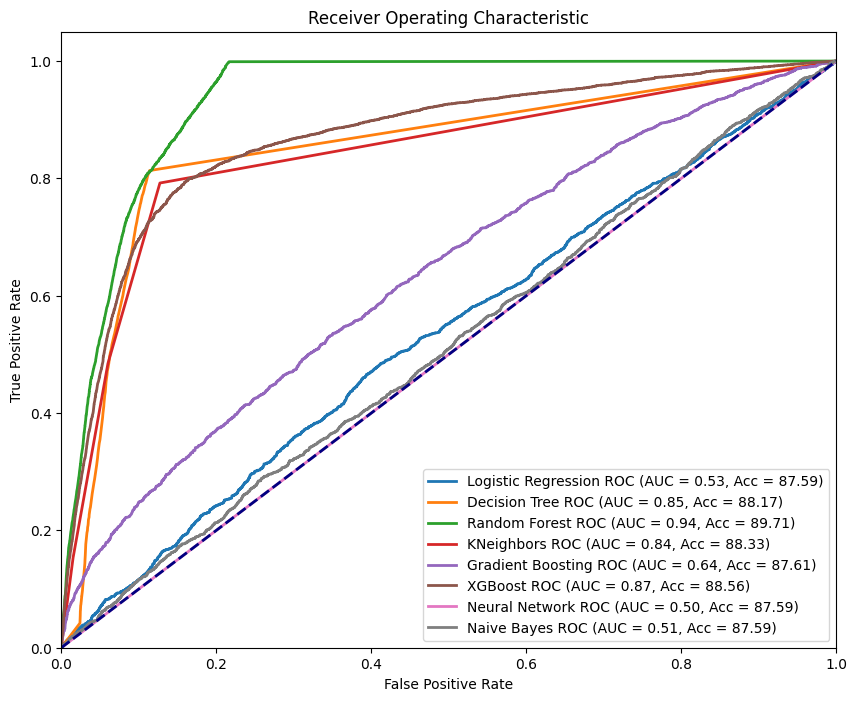

In [ ]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, (fpr, tpr, roc_auc, accuracy) in roc_data.items():
    plt.plot(fpr, tpr, lw=2, label='%s ROC (AUC = %0.2f, Acc = %0.2f)' % (name, roc_auc, accuracy * 100))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()